## קוד בסיסי לתקשורת עם DAC_ACD
מתבסס על הקובץ myserial.py 

In [5]:
from myserial import *    
from time import sleep
import pandas as pd
%matplotlib inline
print("ready")

ready


In [6]:
with Serial("COM6",115200) as ser:
    init_serial(ser)
    run_operation(ser,"*RDY?", ver=True)



OP *RDY? returned READY



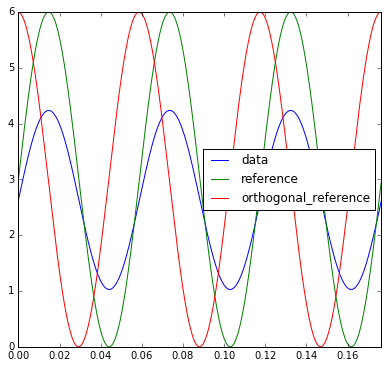

In [73]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    res = buffer_sine(ser, dac_channel=2, 
    adc_channel=2, mid_voltage = 3, amplitude = 3,
    frequency = 17, steps = 300,
    iterations = 3)
res.plot()

In [99]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    ser.reset_output_buffer()
    init_serial(ser)
    run_operation(ser,"SINE_READ,2,2,0,1,17, 80", ver=True)
    sleep(1)
    ser.write("DC 2\r".encode())
    print(ser.readline().decode())
    """for i in range(-3,3):
        sleep(1)
        ser.write("DC {}\r".format(i).encode())
        print(ser.readline().decode())
    """




OP SINE_READ,2,2,0,1,17, 80 returned Running real freq : 17.01





In [101]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    run_operation(ser,"SINE_READ,2,2,0,1,17, 80", ver=True)
    #run_operation(ser,"SINE,2,0,1,17, 80", ver=True)
    ser.flush()
    for i in range(1,8):
        sleep(1)
        run_operation(ser,"PK ", ver = True)
        data = "AC {}\r".format(i).encode()
        ser.write(data)
        #print(ser.readline())
        

        




OP SINE_READ,2,2,0,1,17, 80 returned Sine with read is running real freq : 17.01

OP PK 2 returned 1.9989

OP PK 2 returned 1.9989

OP PK 2 returned 3.9978

OP PK 2 returned 5.9970

OP PK 2 returned 7.9956

OP PK 2 returned 9.9945

OP PK 2 returned 11.9934



In [76]:
round(1/3,3)

0.333

In [43]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    run_operation(ser, "SET,2,4")


In [39]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    try:
        while True:
            run_operation(ser, "RAMP1,2,-4,4.8,50,10")
            run_operation(ser, "RAMP1,2,4.8,-4,50,10")
            run_operation(ser, "RAMP1,2,4.8,-4,50,10")
            run_operation(ser, "RAMP1,2,-4,4.8,50,10")
    except :
        pass

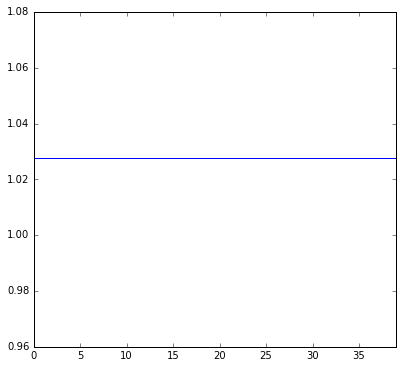

In [11]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    ls = [float(run_operation(ser, "GET_ADC,2")) for i in range(40)]
import pandas as pd
pd.Series(ls).plot()

In [ ]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    res = []
    for _ in range(100): 
        res += buffer_ramp(ser, dac_channel=0,adc_channel=0,
                      begin_voltage=-4,end_voltage=4, 
                      number_of_steps = 1000, 
                      delay_in_microsecs = 30)
        res += buffer_ramp(ser, dac_channel=0,adc_channel=0,
                      begin_voltage=4,end_voltage=-4, 
                      number_of_steps = 1000, 
                      delay_in_microsecs = 30)
pd.Series(res).plot()

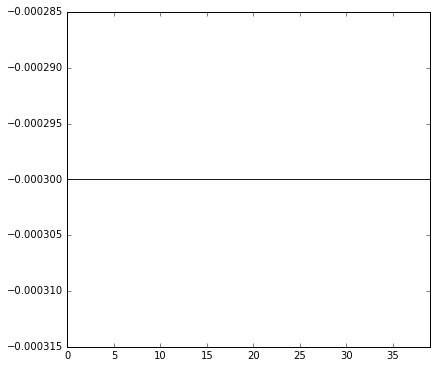

In [2]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    ls = [float(run_operation(ser, "GET_ADC,2")) for i in range(40)]
import pandas as pd
pd.Series(ls).plot()

In [ ]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    while True:
        for i in range(-4,5):
            run_operation(ser, "SET,2,{}".format(i))
            sleep(1)


KeyboardInterrupt: 

In [2]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    init_serial(ser)
    while True:
        run_operation(ser, "SET,2,-2")
        sleep(.03)
        run_operation(ser, "SET,2,2")
        sleep(.03)


SerialException: read failed: [Errno 6] Device not configured

In [40]:
with Serial("/dev/tty.usbmodem1421",115200) as ser:
    ser.reset_output_buffer()
    init_serial(ser)
    num = 2
    run_operation(ser,"SINE,2,0,1,{}, 150".format(num**1.0023), ver=True)



OP SINE,2,0,1,2.003191019978195, 150 returned Running real freq : 2.00



In [63]:
def run_sine(channel, dc, ac, freq):
    with Serial("/dev/tty.usbmodem1421",115200) as ser:
        ser.reset_output_buffer()
        init_serial(ser)
        run_operation(ser,"SINE,{channel},{dc},{ac},{freq}, 150".format(channel=channel,
                                                                       dc = dc,
                                                                        ac = ac,
                                                                       freq = freq**1.002))

In [64]:
for i in range(3,30):
    run_sine(2,0,2, i)
    sleep(4)

KeyboardInterrupt: 

In [75]:
with open("temp_files/temp.txt","wb") as f:
    f.write("SINE,2,0,1,17,80\r".encode())

In [69]:
!open ./myserial.py

את הפרוטוקול אפשר למצוא באתר הזה:

http://opendacs.com/dac-adc-homepage/how-to-communicate-with-the-dac-adc/


תיעוד של tft.h:

https://www.arduino.cc/en/Reference/TFTLibrary